In [0]:
from pyspark.sql.types import StructField, StructType, StringType, IntegerType,BooleanType, DateType, DecimalType
from pyspark.sql.functions import col, when, sum, avg, row_number
from pyspark.sql.window import Window
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("IPL Data Analysis").getOrCreate()

In [0]:
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])

ball_by_ball_df = spark.read.schema(ball_by_ball_schema).format("csv").option("header","true").load("s3://stan-ipl-dataset/ball_by_ball.csv")

In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),  # Using IntegerType for year
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])

match_df = spark.read.schema(match_schema).format("csv").option("header","true").load("s3://stan-ipl-dataset/match.csv").display(5)

match_sk match_id team1 team2 match_date season_year venue_name city_name country_name toss_winner match_winner toss_name win_type outcome_type manofmach win_margin country_id 0 335987 Royal Challengers Bangalore Kolkata Knight Riders 2008-04-18 2008 M Chinnaswamy Stadium Bangalore India Royal Challengers Bangalore Kolkata Knight Riders field runs Result BB McCullum 140 1 1 335988 Kings XI Punjab Chennai Super Kings 2008-04-19 2008 Punjab Cricket Association Stadium, Mohali Chandigarh India Chennai Super Kings Chennai Super Kings bat runs Result MEK Hussey 33 1 2 335989 Delhi Daredevils Rajasthan Royals 2008-04-19 2008 Feroz Shah Kotla Delhi India Rajasthan Royals Delhi Daredevils bat wickets Result MF Maharoof 9 1 3 335990 Mumbai Indians Royal Challengers Bangalore 2008-04-20 2008 Wankhede Stadium Mumbai India Mumbai Indians Royal Challengers Bangalore bat wickets Result MV Boucher 5 1 4 335991 Kolkata Knight Riders Deccan Chargers 2008-04-20 2008 Eden Gardens Kolkata India Deccan Chargers Kolkata Knight Riders bat wickets Result DJ Hussey 5 1 5 335992 Rajasthan Royals Kings XI Punjab 2008-04-21 2008 Sawai Mansingh Stadium Jaipur India Kings XI Punjab Rajasthan Royals bat wickets Result SR Watson 6 1 6 335993 Deccan Chargers Delhi Daredevils 2008-04-22 2008 Rajiv Gandhi International Stadium, Uppal Hyderabad India Deccan Chargers Delhi Daredevils bat wickets Result V Sehwag 9 1 7 335994 Chennai Super Kings Mumbai Indians 2008-04-23 2008 MA Chidambaram Stadium, Chepauk Chennai India Mumbai Indians Chennai Super Kings field runs Result ML Hayden 6 1 8 335995 Deccan Chargers Rajasthan Royals 2008-04-24 2008 Rajiv Gandhi International Stadium, Uppal Hyderabad India Rajasthan Royals Rajasthan Royals field wickets Result YK Pathan 3 1 9 335996 Kings XI Punjab Mumbai Indians 2008-04-25 2008 Punjab Cricket Association Stadium, Mohali Chandigarh India Mumbai Indians Kings XI Punjab field runs Result KC Sangakkara 66 1 10 335997 Royal Challengers Bangalore Rajasthan Royals 2008-04-26 2008 M Chinnaswamy Stadium Bangalore India Rajasthan Royals Rajasthan Royals field wickets Result SR Watson 7 1 11 335998 Chennai Super Kings Kolkata Knight Riders 2008-04-26 2008 MA Chidambaram Stadium, Chepauk Chennai India Kolkata Knight Riders Chennai Super Kings bat wickets Result JDP Oram 9 1 12 335999 Mumbai Indians Deccan Chargers 2008-04-27 2008 Dr DY Patil Sports Academy Mumbai India Deccan Chargers Deccan Chargers field wickets Result AC Gilchrist 10 1 13 336000 Kings XI Punjab Delhi Daredevils 2008-04-27 2008 Punjab Cricket Association Stadium, Mohali Chandigarh India Delhi Daredevils Kings XI Punjab bat wickets Result SM Katich 4 1 14 336001 Royal Challengers Bangalore Chennai Super Kings 2008-04-28 2008 M Chinnaswamy Stadium Bangalore India Chennai Super Kings Chennai Super Kings bat runs Result MS Dhoni 13 1 15 336002 Kolkata Knight Riders Mumbai Indians 2008-04-29 2008 Eden Gardens Kolkata India Kolkata Knight Riders Mumbai Indians bat wickets Result ST Jayasuriya 7 1 16 336003 Delhi Daredevils Royal Challengers Bangalore 2008-04-30 2008 Feroz Shah Kotla Delhi India Royal Challengers Bangalore Delhi Daredevils field runs Result GD McGrath 10 1 17 336004 Deccan Chargers Kings XI Punjab 2008-05-01 2008 Rajiv Gandhi International Stadium, Uppal Hyderabad India Kings XI Punjab Kings XI Punjab field wickets Result SE Marsh 7 1 18 336005 Rajasthan Royals Kolkata Knight Riders 2008-05-01 2008 Sawai Mansingh Stadium Jaipur India Rajasthan Royals Rajasthan Royals bat runs Result SA Asnodkar 45 1 19 336006 Chennai Super Kings Delhi Daredevils 2008-05-02 2008 MA Chidambaram Stadium, Chepauk Chennai India Chennai Super Kings Delhi Daredevils bat wickets Result V Sehwag 8 1 20 336007 Deccan Chargers Royal Challengers Bangalore 2008-05-25 2008 Rajiv Gandhi International Stadium, Uppal Hyderabad India Deccan Chargers Royal Challengers Bangalore bat wickets Result R Vinay Kumar 5 1 21 336008 Kings XI Punjab Kolkata Knight Riders 2008-05-03 2008 Punjab Cric

In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(20, 2), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True), 
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

player_match_df = spark.read.schema(player_match_schema).format("csv").option("header","true").load("s3://stan-ipl-dataset/player_match.csv").display(5)

player_match_sk playermatch_key match_id player_id player_name dob batting_hand bowling_skill country_name role_desc player_team opposit_team season_year is_manofthematch age_as_on_match isplayers_team_won batting_status bowling_status player_captain opposit_captain player_keeper opposit_keeper -1 -1.00 -1 -1 N/A null null null null null null null null null null null null null null null null null 12694 33598700006.00 335987 6 R Dravid 1973-01-11 Right-hand bat Right-arm offbreak India Captain Royal Challengers Bangalore Kolkata Knight Riders 2008 false 35 false null null R Dravid SC Ganguly MV Boucher WP Saha 12695 33598700007.00 335987 7 W Jaffer 1978-02-16 Right-hand bat Right-arm offbreak India Player Royal Challengers Bangalore Kolkata Knight Riders 2008 false 30 false null null R Dravid SC Ganguly MV Boucher WP Saha 12696 33598700008.00 335987 8 V Kohli 1988-11-05 Right-hand bat Right-arm medium India Player Royal Challengers Bangalore Kolkata Knight Riders 2008 false 20 false null null R Dravid SC Ganguly MV Boucher WP Saha 12697 33598700009.00 335987 9 JH Kallis 1975-10-16 Right-hand bat Right-arm fast-medium South Africa Player Royal Challengers Bangalore Kolkata Knight Riders 2008 false 33 false null null R Dravid SC Ganguly MV Boucher WP Saha 12698 33598700010.00 335987 10 CL White 1983-08-18 Right-hand bat Legbreak googly Australia Player Royal Challengers Bangalore Kolkata Knight Riders 2008 false 25 false null null R Dravid SC Ganguly MV Boucher WP Saha 12699 33598700011.00 335987 11 MV Boucher 1976-12-03 Right-hand bat Right-arm medium South Africa Keeper Royal Challengers Bangalore Kolkata Knight Riders 2008 false 32 false null null R Dravid SC Ganguly MV Boucher WP Saha 12700 33598700012.00 335987 12 B Akhil 1977-10-07 Right-hand bat Right-arm medium-fast India Player Royal Challengers Bangalore Kolkata Knight Riders 2008 false 31 false null null R Dravid SC Ganguly MV Boucher WP Saha 12701 33598700013.00 335987 13 AA Noffke 1977-04-30 Right-hand bat Right-arm fast-medium Australia Player Royal Challengers Bangalore Kolkata Knight Riders 2008 false 31 false null null R Dravid SC Ganguly MV Boucher WP Saha 12702 33598700014.00 335987 14 P Kumar 1986-10-02 Right-hand bat Right-arm medium India Player Royal Challengers Bangalore Kolkata Knight Riders 2008 false 22 false null null R Dravid SC Ganguly MV Boucher WP Saha 12703 33598700015.00 335987 15 Z Khan 1978-10-07 Right-hand bat Left-arm fast-medium India Player Royal Challengers Bangalore Kolkata Knight Riders 2008 false 30 false null null R Dravid SC Ganguly MV Boucher WP Saha 12704 33598700016.00 335987 16 SB Joshi 1970-06-06 Left-hand bat Slow left-arm orthodox India Player Royal Challengers Bangalore Kolkata Knight Riders 2008 false 38 false null null R Dravid SC Ganguly MV Boucher WP Saha 12705 33598700001.00 335987 1 SC Ganguly 1972-07-08 Left-hand bat Right-arm medium India Captain Kolkata Knight Riders Royal Challengers Bangalore 2008 false 36 true null null SC Ganguly R Dravid WP Saha MV Boucher 12706 33598700002.00 335987 2 BB McCullum 1981-09-27 Right-hand bat Right-arm medium New Zealand Player Kolkata Knight Riders Royal Challengers Bangalore 2008 true 27 true null null SC Ganguly R Dravid WP Saha MV Boucher 12707 33598700003.00 335987 3 RT Ponting 1974-12-19 Right-hand bat Right-arm medium Australia Player Kolkata Knight Riders Royal Challengers Bangalore 2008 false 34 true null null SC Ganguly R Dravid WP Saha MV Boucher 12708 33598700004.00 335987 4 DJ Hussey 1977-07-15 Right-hand bat Right-arm offbreak Australia Player Kolkata Knight Riders Royal Challengers Bangalore 2008 false 31 true null null SC Ganguly R Dravid WP Saha MV Boucher 12709 33598700005.00 335987 5 Mohammad Hafeez 1980-10-17 Right-hand bat Right-arm offbreak Pakistan Player Kolkata Knight Riders Royal Challengers Bangalore 2008 false 28 true null null SC Ganguly R Dravid WP Saha MV Boucher 12710 33598700062.00 335987 62 WP Saha 1984-10-24 Right-hand bat N/A India Keeper Kolkata 

In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

player_df = spark.read.schema(player_schema).format("csv").option("header","true").load("s3://stan-ipl-dataset/player.csv").display(5)

player_sk player_id player_name dob batting_hand bowling_skill country_name 0 1 SC Ganguly 1972-07-08 Left-hand bat Right-arm medium India 1 2 BB McCullum 1981-09-27 Right-hand bat Right-arm medium New Zealand 2 3 RT Ponting 1974-12-19 Right-hand bat Right-arm medium Australia 3 4 DJ Hussey 1977-07-15 Right-hand bat Right-arm offbreak Australia 4 5 Mohammad Hafeez 1980-10-17 Right-hand bat Right-arm offbreak Pakistan 5 6 R Dravid 1973-01-11 Right-hand bat Right-arm offbreak India 6 7 W Jaffer 1978-02-16 Right-hand bat Right-arm offbreak India 7 8 V Kohli 1988-11-05 Right-hand bat Right-arm medium India 8 9 JH Kallis 1975-10-16 Right-hand bat Right-arm fast-medium South Africa 9 10 CL White 1983-08-18 Right-hand bat Legbreak googly Australia 10 11 MV Boucher 1976-12-03 Right-hand bat Right-arm medium South Africa 11 12 B Akhil 1977-10-07 Right-hand bat Right-arm medium-fast India 12 13 AA Noffke 1977-04-30 Right-hand bat Right-arm fast-medium Australia 13 14 P Kumar 1986-10-02 Right-hand bat Right-arm medium India 14 15 Z Khan 1978-10-07 Right-hand bat Left-arm fast-medium India 15 16 SB Joshi 1970-06-06 Left-hand bat Slow left-arm orthodox India 16 17 PA Patel 1985-03-09 Left-hand bat N/A India 17 18 ML Hayden 1971-10-29 Left-hand bat Right-arm medium Australia 18 19 MEK Hussey 1975-05-27 Left-hand bat Right-arm medium Australia 19 20 MS Dhoni 1981-07-07 Right-hand bat Right-arm medium India 20 21 SK Raina 1986-11-27 Left-hand bat Right-arm offbreak India 21 22 JDP Oram 1978-07-28 Left-hand bat Right-arm fast-medium New Zealand 22 23 S Badrinath 1980-08-30 Right-hand bat Right-arm offbreak India 23 24 K Goel 1986-12-24 Left-hand bat Right-arm offbreak India 24 25 JR Hopes 1978-10-24 Right-hand bat Right-arm medium Australia 25 26 KC Sangakkara 1977-10-27 Left-hand bat Right-arm offbreak Sri Lanka 26 27 Yuvraj Singh 1981-12-12 Left-hand bat Slow left-arm orthodox India 27 28 SM Katich 1975-08-21 Left-hand bat Slow left-arm chinaman Australia 28 29 IK Pathan 1984-10-27 Left-hand bat Left-arm medium-fast India 29 30 T Kohli 1988-12-17 Right-hand bat Right-arm medium India 30 31 YK Pathan 1982-11-17 Right-hand bat Right-arm offbreak India 31 32 SR Watson 1981-06-17 Right-hand bat Right-arm fast-medium Australia 32 33 M Kaif 1980-12-01 Right-hand bat Right-arm offbreak India 33 34 DS Lehmann 1970-02-05 Left-hand bat Slow left-arm orthodox Australia 34 35 RA Jadeja 1988-12-06 Left-hand bat Slow left-arm orthodox India 35 36 M Rawat 1985-10-25 Right-hand bat N/A India 36 37 D Salunkhe 1982-11-12 Right-hand bat Legbreak India 37 38 SK Warne 1969-09-13 Right-hand bat Legbreak googly Australia 38 39 SK Trivedi 1982-09-04 Right-hand bat Right-arm medium India 39 40 G Gambhir 1981-10-14 Left-hand bat Legbreak India 40 41 V Sehwag 1978-10-20 Right-hand bat Right-arm offbreak India 41 42 S Dhawan 1985-12-05 Left-hand bat Right-arm offbreak India 42 43 L Ronchi 1981-04-23 Right-hand bat N/A Australia 43 44 ST Jayasuriya 1969-06-30 Left-hand bat Slow left-arm orthodox Sri Lanka 44 45 DJ Thornely 1978-10-01 Right-hand bat Right-arm medium Australia 45 46 RV Uthappa 1985-11-11 Right-hand bat Right-arm medium India 46 47 PR Shah 1987-11-03 Right-hand bat N/A India 47 48 AM Nayar 1983-10-08 Left-hand bat Right-arm medium India 48 49 SM Pollock 1973-07-16 Right-hand bat Right-arm fast-medium South Africa 49 50 Harbhajan Singh 1980-07-03 Right-hand bat Right-arm offbreak India 50 51 S Chanderpaul 1974-08-16 Left-hand bat Legbreak West Indies 51 52 LRPL Taylor 1984-03-08 Right-hand bat Right-arm offbreak New Zealand 52 53 AC Gilchrist 1971-11-14 Left-hand bat Right-arm offbreak Australia 53 54 Y Venugopal Rao 1982-02-26 Right-hand bat Right-arm offbreak India 54 55 VVS Laxman 1974-11-01 Right-hand bat Right-arm offbreak India 55 56 A Symonds 1975-06-09 Right-hand bat Right-arm offbreak Australia 56 57 RG Sharma 1987-04-30 Right-hand bat Right-arm offbreak India 57 58 SB Styris 1975-07-10 Right-hand bat Right-arm medium New Zealand 58 59 SB Bangar 19

In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

team_df = spark.read.schema(team_schema).format("csv").option("header","true").load("s3://stan-ipl-dataset/team.csv").display()

team_sk team_id team_name 0 1 Kolkata Knight Riders 1 2 Royal Challengers Bangalore 2 3 Chennai Super Kings 3 4 Kings XI Punjab 4 5 Rajasthan Royals 5 6 Delhi Daredevils 6 7 Mumbai Indians 7 8 Deccan Chargers 8 9 Kochi Tuskers Kerala 9 10 Pune Warriors 10 11 Sunrisers Hyderabad 11 12 Rising Pune Supergiants 12 13 Gujarat Lions

In [0]:
# Filter to inlcude only valid deliveries. Exclusing wides and noballs.

filtered_df = ball_by_ball_df.filter((col("wides") == 0) & (col("noballs") == 0))
filtered_df.show()

# Group by season and count valid deliveries

deliveries_per_season = (
    filtered_df.groupBy("season")
    .count()
    .orderBy("season")
)

# Collect to Pandas for plotting
pdf = deliveries_per_season.toPandas()




+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+-----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out|  lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|fielder_match_s

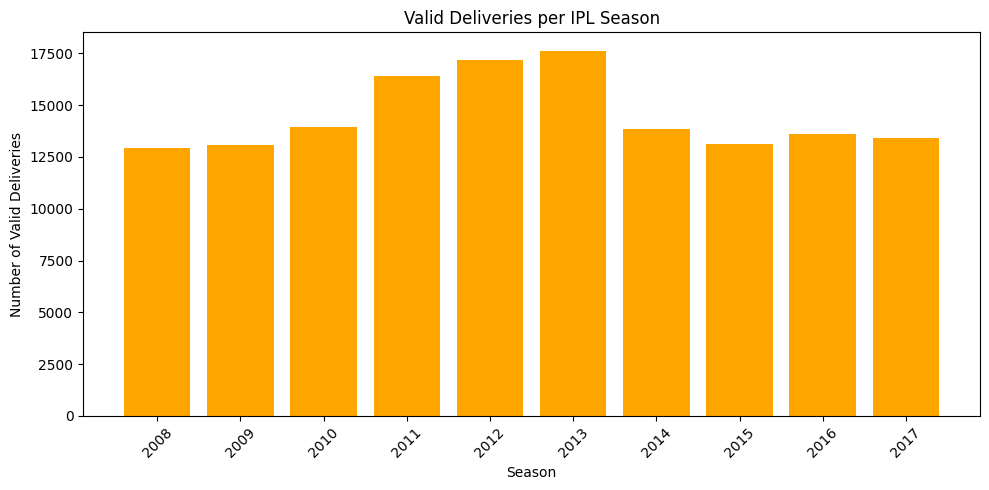

In [0]:
plt.figure(figsize=(10, 5))
plt.bar(pdf["season"].astype(str), pdf["count"], color="orange")
plt.xlabel("Season")
plt.ylabel("Number of Valid Deliveries")
plt.title("Valid Deliveries per IPL Season")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
# Aggregation: Caclulationg total and average runs scored in each match and innings

total_runs_avg = ball_by_ball_df.groupBy("match_id", "innings_no").agg(sum("runs_scored").alias ("total_runs"), avg("runs_scored").alias("avg_runs"))

total_runs_avg.show()

In [0]:
#Window function: Calculating running total of runs in each match for each over

running_total = Window.partitionBy("match_id").orderBy("over_id")
running_total_df = filtered_df.withColumn("running_total", sum("runs_scored").over(running_total))
# running_total_df.show()
display(running_total_df)